In [2]:
import sys
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE
import shap 


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,  VotingClassifier, AdaBoostClassifier, BaggingClassifier, RandomForestClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


In [ ]:
data = pd.read_csv('archive/data.csv')
prep_data = pd.read_csv('archive/preprocessed_data.csv')
raw_fighter_details = pd.read_csv('archive/raw_fighter_details.csv')
raw_total_fight_data = pd.read_csv('archive/raw_total_fight_data.csv')

In [ ]:
data.describe()

,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,...,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
count,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.00000,4585.000000,...,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6008.000000,5606.000000,6010.000000,5840.000000,5949.000000
mean,0.247476,0.176818,0.453310,0.434290,0.292650,0.268742,0.478884,0.409276,0.15673,0.141306,...,0.306886,1.251331,1.297572,0.796241,0.069195,178.991788,183.562347,170.686356,29.293151,29.598252
std,0.378509,0.324633,0.130458,0.132618,0.273628,0.267178,0.724229,0.653826,0.34199,0.322623,...,0.619485,1.681376,1.859955,1.355801,0.273980,8.812985,10.585313,35.724626,4.063297,4.167755
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,152.400000,152.400000,115.000000,18.000000,19.000000
25%,0.000000,0.000000,0.376489,0.351045,0.031250,0.033203,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,172.720000,177.800000,145.000000,26.000000,27.000000
50%,0.015625,0.000000,0.450000,0.427500,0.250000,0.200000,0.148468,0.098389,0.00000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,180.340000,182.880000,170.000000,29.000000,29.000000
75%,0.500000,0.250000,0.527500,0.510000,0.500000,0.422812,0.750000,0.531250,0.12500,0.125000,...,0.000000,2.000000,2.000000,1.000000,0.000000,185.420000,190.500000,185.000000,32.000000,32.000000
max,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,8.000000,7.000000,4.00000,3.000000,...,5.000000,10.000000,11.000000,13.000000,2.000000,210.820000,213.360000,345.000000,51.000000,47.000000


In [ ]:
prep_data.describe()

,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,...,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch
count,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,...,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000
mean,0.193739,0.135246,0.452788,0.432788,0.282610,0.252897,0.400956,0.335873,0.120343,0.108563,...,0.001525,0.764825,0.000678,0.193155,0.039817,0.002542,0.759065,0.000339,0.205015,0.033040
std,0.346475,0.294238,0.114325,0.116189,0.239811,0.235253,0.648117,0.586483,0.307538,0.289504,...,0.039024,0.424144,0.026027,0.394807,0.195546,0.050354,0.427687,0.018407,0.403747,0.178755
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.401611,0.376250,0.100000,0.082733,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.015625,0.000000,0.450000,0.427500,0.250000,0.200000,0.148468,0.098389,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.250000,0.093750,0.500000,0.480000,0.395828,0.330000,0.500000,0.500000,0.031250,0.007820,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,8.000000,7.000000,4.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
other_winners = prep_data[~prep_data['Winner'].isin(['Red', 'Blue'])]['Winner'].unique()
if len(other_winners) > 0:
    print("Other winners found:", other_winners)
else:
    print("No other winners found.")

No other winners found.


In [ ]:
win_counts = prep_data['Winner'].value_counts()
red_wins = win_counts['Red']
blue_wins = win_counts['Blue']

red_wins, blue_wins

(3979, 1923)

In [ ]:
prep_data.describe(include='object')

,Winner
count,5902
unique,2
top,Red
freq,3979


In [ ]:
raw_fighter_details.describe()

,SLpM,SApM,TD_Avg,Sub_Avg
count,3596.000000,3596.000000,3596.000000,3596.000000
mean,2.279633,2.982948,1.211243,0.636707
std,1.901956,2.814008,1.914020,1.566843
min,0.000000,0.000000,0.000000,0.000000
25%,0.700000,1.400000,0.000000,0.000000
50%,2.170000,2.760000,0.510000,0.000000
75%,3.420000,4.002500,1.885000,0.800000
max,19.910000,52.500000,32.140000,21.900000


In [ ]:
raw_total_fight_data.describe()

,R_fighter;B_fighter;R_KD;B_KD;R_SIG_STR.;B_SIG_STR.;R_SIG_STR_pct;B_SIG_STR_pct;R_TOTAL_STR.;B_TOTAL_STR.;R_TD;B_TD;R_TD_pct;B_TD_pct;R_SUB_ATT;B_SUB_ATT;R_REV;B_REV;R_CTRL;B_CTRL;R_HEAD;B_HEAD;R_BODY;B_BODY;R_LEG;B_LEG;R_DISTANCE;B_DISTANCE;R_CLINCH;B_CLINCH;R_GROUND;B_GROUND;win_by;last_round;last_round_time;Format;Referee;date;location;Fight_type;Winner
count,5498
unique,2768
top,USA;Lightweight Bout;Jim Miller
freq,16


In [ ]:
data.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0


In [ ]:
def display_missing_values(df, df_name):
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    print(f"Missing Values in {df_name}:\n", missing_values)

In [ ]:

# Display missing values for each dataset
display_missing_values(data, 'Data')


Missing Values in Data:
 Referee                    32
B_avg_KD                 1427
B_avg_opp_KD             1427
B_avg_SIG_STR_pct        1427
B_avg_opp_SIG_STR_pct    1427
                         ... 
R_Height_cms                4
R_Reach_cms               406
R_Weight_lbs                2
B_age                     172
R_age                      63
Length: 109, dtype: int64


In [ ]:
display_missing_values(prep_data, 'Preprocessed Data')


Missing Values in Preprocessed Data:
 Series([], dtype: int64)


In [ ]:
display_missing_values(raw_fighter_details, 'Raw Fighter Details')

Missing Values in Raw Fighter Details:
 Height     263
Weight      74
Reach     1912
Stance     804
DOB        739
dtype: int64


In [ ]:
display_missing_values(raw_total_fight_data, 'Raw Total Fight Data')


Missing Values in Raw Total Fight Data:
 R_fighter;B_fighter;R_KD;B_KD;R_SIG_STR.;B_SIG_STR.;R_SIG_STR_pct;B_SIG_STR_pct;R_TOTAL_STR.;B_TOTAL_STR.;R_TD;B_TD;R_TD_pct;B_TD_pct;R_SUB_ATT;B_SUB_ATT;R_REV;B_REV;R_CTRL;B_CTRL;R_HEAD;B_HEAD;R_BODY;B_BODY;R_LEG;B_LEG;R_DISTANCE;B_DISTANCE;R_CLINCH;B_CLINCH;R_GROUND;B_GROUND;win_by;last_round;last_round_time;Format;Referee;date;location;Fight_type;Winner    514
dtype: int64


In [ ]:
prep_data.head()

,Winner,title_bout,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,...,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch
0,Red,False,0.000000,0.0,0.420000,0.49500,0.330,0.36000,0.500000,1.000000,...,0,1,0,0,0,0,1,0,0,0
1,Red,False,0.500000,0.0,0.660000,0.30500,0.300,0.50000,1.500000,0.000000,...,0,1,0,0,0,0,1,0,0,0
2,Red,False,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,...,0,1,0,0,0,0,0,0,1,0
3,Blue,False,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,...,0,0,0,1,0,0,0,0,0,1
4,Blue,False,0.125000,0.0,0.535625,0.57875,0.185,0.16625,0.125000,0.187500,...,0,1,0,0,0,0,1,0,0,0


In [ ]:
print(prep_data["B_age"])

0       31.0
1       32.0
2       32.0
3       28.0
4       29.0
        ... 
5897    29.0
5898    29.0
5899    29.0
5900    29.0
5901    18.0
Name: B_age, Length: 5902, dtype: float64


In [ ]:
prep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5902 entries, 0 to 5901
Columns: 160 entries, Winner to R_Stance_Switch
dtypes: bool(1), float64(106), int64(52), object(1)
memory usage: 7.2+ MB


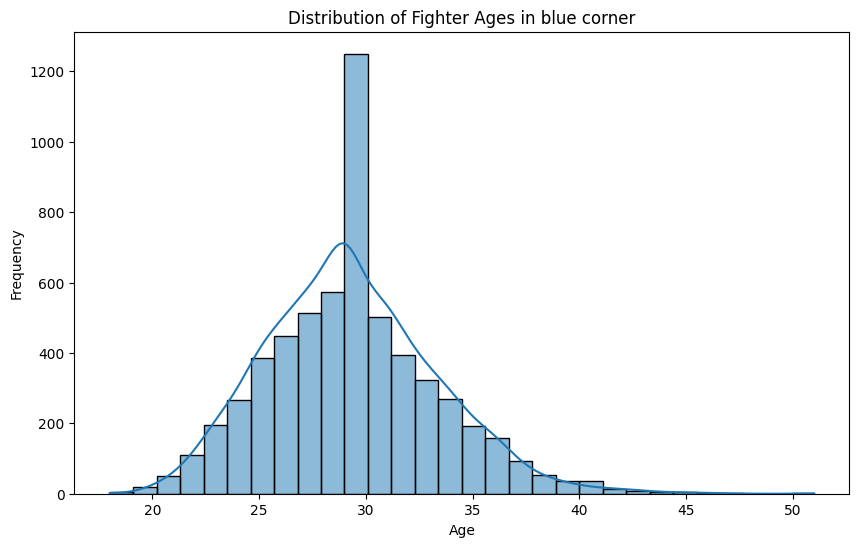

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(prep_data['B_age'], bins=30, kde=True)
plt.title('Distribution of Fighter Ages in blue corner')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

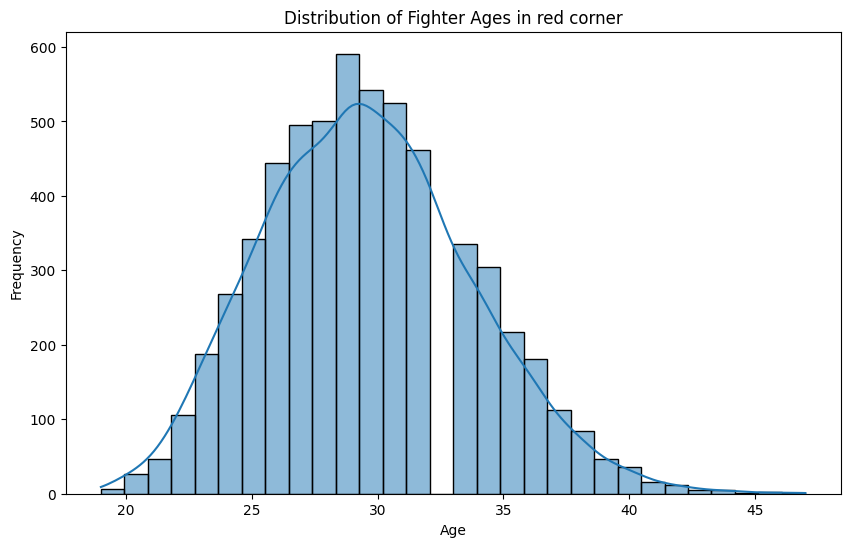

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(prep_data['R_age'], bins=30, kde=True)
plt.title('Distribution of Fighter Ages in red corner')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
prep_data = prep_data.dropna(subset=['Winner'])


In [ ]:
features = prep_data.columns.drop('Winner')


prep_data['Winner'] = prep_data['Winner'].map({'Red': 0, 'Blue': 1})

X = prep_data[features]
y = prep_data['Winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [ ]:
y.isnull().sum()

0

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.68
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.86      0.78      1196
           1       0.51      0.31      0.38       575

    accuracy                           0.68      1771
   macro avg       0.61      0.58      0.58      1771
weighted avg       0.65      0.68      0.65      1771

Confusion Matrix:
[[1025  171]
 [ 399  176]]


C:\Users\kisha\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
prep_data.head()

,Winner,title_bout,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,...,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch
0,0,False,0.000000,0.0,0.420000,0.49500,0.330,0.36000,0.500000,1.000000,...,0,1,0,0,0,0,1,0,0,0
1,0,False,0.500000,0.0,0.660000,0.30500,0.300,0.50000,1.500000,0.000000,...,0,1,0,0,0,0,1,0,0,0
2,0,False,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,...,0,1,0,0,0,0,0,0,1,0
3,1,False,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,...,0,0,0,1,0,0,0,0,0,1
4,1,False,0.125000,0.0,0.535625,0.57875,0.185,0.16625,0.125000,0.187500,...,0,1,0,0,0,0,1,0,0,0


In [ ]:
prep_data = prep_data.dropna(subset=['Winner'])
prep_data['Winner'] = prep_data['Winner']

In [ ]:
prep_data.head()

,Winner,title_bout,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,...,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch
0,0,False,0.000000,0.0,0.420000,0.49500,0.330,0.36000,0.500000,1.000000,...,0,1,0,0,0,0,1,0,0,0
1,0,False,0.500000,0.0,0.660000,0.30500,0.300,0.50000,1.500000,0.000000,...,0,1,0,0,0,0,1,0,0,0
2,0,False,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,...,0,1,0,0,0,0,0,0,1,0
3,1,False,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,...,0,0,0,1,0,0,0,0,0,1
4,1,False,0.125000,0.0,0.535625,0.57875,0.185,0.16625,0.125000,0.187500,...,0,1,0,0,0,0,1,0,0,0


In [ ]:
features = prep_data.columns.drop('Winner')
X = prep_data[features].values
y = prep_data['Winner'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
print(y)

[0 0 0 ... 0 0 0]


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
# X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
# y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)  


train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
class NeuralNet(nn.Module):
    def __init__(self, input_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 1024)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(1024, 512)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(512, 256)
        self.dropout3 = nn.Dropout(0.5)
        self.fc4 = nn.Linear(256, 128)
        self.dropout4 = nn.Dropout(0.5)
        self.fc5 = nn.Linear(128, 64)
        self.dropout5 = nn.Dropout(0.5)
        self.fc6 = nn.Linear(64, 32)
        self.dropout6 = nn.Dropout(0.5)
        self.fc7 = nn.Linear(32, 1)

        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.sigmoid(self.fc3(x))
        x = self.dropout3(x)
        x = torch.relu(self.fc4(x))
        x = self.dropout4(x)
        x = torch.relu(self.fc5(x))
        x = self.dropout5(x)
        x = torch.relu(self.fc6(x))
        x = self.dropout6(x)
        x = self.fc7(x)
        
        return x

In [ ]:
input_size = X_train.shape[1]
nn_model = NeuralNet(input_size)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(nn_model.parameters(), lr=0.001)

In [ ]:
num_epochs = 200
nn_model.train()
for epoch in range(num_epochs):
    for X_batch, y_batch in train_loader:
        outputs = nn_model(X_batch)
        loss = criterion(outputs, y_batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1/200], Loss: 0.5453
Epoch [2/200], Loss: 0.7927
Epoch [3/200], Loss: 0.5767
Epoch [4/200], Loss: 0.2953
Epoch [5/200], Loss: 0.8177
Epoch [6/200], Loss: 0.1669
Epoch [7/200], Loss: 0.5083
Epoch [8/200], Loss: 0.5876
Epoch [9/200], Loss: 1.0387
Epoch [10/200], Loss: 0.3196
Epoch [11/200], Loss: 0.5149
Epoch [12/200], Loss: 0.9163
Epoch [13/200], Loss: 0.2583
Epoch [14/200], Loss: 0.3577
Epoch [15/200], Loss: 0.8317
Epoch [16/200], Loss: 0.1904
Epoch [17/200], Loss: 0.0924
Epoch [18/200], Loss: 0.5005
Epoch [19/200], Loss: 0.4302
Epoch [20/200], Loss: 0.6552
Epoch [21/200], Loss: 0.3890
Epoch [22/200], Loss: 0.5418
Epoch [23/200], Loss: 0.9413
Epoch [24/200], Loss: 0.5969
Epoch [25/200], Loss: 0.3138
Epoch [26/200], Loss: 1.3957
Epoch [27/200], Loss: 0.3011
Epoch [28/200], Loss: 0.8124
Epoch [29/200], Loss: 0.9463
Epoch [30/200], Loss: 0.6839
Epoch [31/200], Loss: 0.9750
Epoch [32/200], Loss: 0.5371
Epoch [33/200], Loss: 0.5076
Epoch [34/200], Loss: 0.2581
Epoch [35/200], Loss: 0

In [ ]:
nn_model.eval()
with torch.no_grad():
    y_pred = []
    y_true = []
    for X_batch, y_batch in test_loader:
        outputs = nn_model(X_batch)
        predicted = (outputs > 0.5).float()
        y_pred.extend(predicted.numpy())
        y_true.extend(y_batch.numpy())

accuracy = (np.array(y_pred) == np.array(y_true)).mean()
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.6324


In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

results = []

for fold, (train_index, val_index) in enumerate(kf.split(X_train_tensor)):
    X_train_fold, X_val_fold = X_train_tensor[train_index], X_train_tensor[val_index]
    y_train_fold, y_val_fold = y_train_tensor[train_index], y_train_tensor[val_index]

    train_dataset = TensorDataset(X_train_fold, y_train_fold)
    val_dataset = TensorDataset(X_val_fold, y_val_fold)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

    model = NeuralNet(input_size) 
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(num_epochs):
       model.eval()
    with torch.no_grad():
        val_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            predicted = (outputs > 0.5).float()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_acc = correct / total
    results.append(val_acc)  


average_val_accuracy = sum(results) / len(results)
print(f'Average Validation Accuracy: {average_val_accuracy:.4f}')

Average Validation Accuracy: 0.6737


In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

Y_pref_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, Y_pref_rf)
print(f'Accuracy: {accuracy_rf:.2f}')

print('Classification Report:')
print(classification_report(y_test, Y_pref_rf))
print('Confusion Matrix:')
print(confusion_matrix(y_test, Y_pref_rf))


Accuracy: 0.67
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.92      0.79      1196
           1       0.50      0.17      0.25       575

    accuracy                           0.67      1771
   macro avg       0.60      0.54      0.52      1771
weighted avg       0.63      0.67      0.62      1771

Confusion Matrix:
[[1099   97]
 [ 479   96]]


Random forest with k fold cross validation

In [ ]:
kf = KFold(n_splits=40, shuffle=True, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

scores = cross_val_score(rf_model, X, y, cv=kf, scoring='accuracy')

print(f'Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})')


Accuracy: 0.68 (+/- 0.08)


In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [ ]:
params = {
    'objective': 'binary:logistic',  # for binary classification
    'max_depth': 6,                  # maximum depth of a tree
    'eta': 0.3,                      # step size shrinkage
    'eval_metric': 'logloss',        # evaluation metric
}

In [ ]:
bst = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions
y_pred_prob = bst.predict(dtest)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

In [ ]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

# Train the model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
cm = confusion_matrix(y_test, y_pred)

# Print metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')
print(f'Confusion Matrix:\n {cm}')

Accuracy: 0.6679841897233202
Precision: 0.48293963254593175
Recall: 0.32
F1 Score: 0.38493723849372385
ROC AUC: 0.6574480151228734
Confusion Matrix:
 [[999 197]
 [391 184]]


In [ ]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=Non...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy', verbose=2)

In [ ]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f'Best Parameters: {best_params}')

# Evaluate on the test set
y_pred_prob = best_model.predict_proba(X_test)[:, 1]
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

Best Parameters: {'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
cm = confusion_matrix(y_test, y_pred)

# Print metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')
print(f'Confusion Matrix:\n {cm}')

Accuracy: 0.6736307171089779
Precision: 0.49238578680203043
Recall: 0.16869565217391305
F1 Score: 0.25129533678756477
ROC AUC: 0.6729329649556492
Confusion Matrix:
 [[1096  100]
 [ 478   97]]


In [ ]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


In [ ]:
# Initialize XGBoost model
xgb_model_sm = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

# Train the model
xgb_model_sm.fit(X_train_res, y_train_res)

# Make predictions
y_pred_prob_sm = xgb_model_sm.predict_proba(X_test)[:, 1]
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob_sm]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob_sm)
cm = confusion_matrix(y_test, y_pred)

# Print metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')
print(f'Confusion Matrix:\n {cm}')

Accuracy: 0.6566911349520045
Precision: 0.4618937644341801
Recall: 0.34782608695652173
F1 Score: 0.3968253968253968
ROC AUC: 0.6519397993311037
Confusion Matrix:
 [[963 233]
 [375 200]]


ENSEMBLE


In [ ]:
prep_data_ensemble = pd.read_csv('archive/preprocessed_data.csv')
print(f"Initial data shape: {prep_data_ensemble.shape}")

# Drop rows with missing 'Winner'
prep_data_ensemble = prep_data_ensemble.dropna(subset=['Winner'])
print(f"Data shape after dropping NaN in 'Winner': {prep_data_ensemble.shape}")

# Encode 'Winner' column
prep_data_ensemble['Winner'] = prep_data_ensemble['Winner'].map({'Red': 0, 'Blue': 1})

# Handle remaining NaN values in features (using median imputation as an example)
prep_data_ensemble.fillna(prep_data_ensemble.median(numeric_only=True), inplace=True)
print(f"Data shape after filling NaN values: {prep_data_ensemble.shape}")

# # Feature Engineering (Example: creating age difference feature)
# prep_data_ensemble['age_diff'] = prep_data_ensemble['R_age'] - prep_data_ensemble['B_age']
# prep_data_ensemble['height_diff'] = prep_data_ensemble['R_Height_cms'] - prep_data_ensemble['B_Height_cms']
# prep_data_ensemble['reach_diff'] = prep_data_ensemble['R_Reach_cms'] - prep_data_ensemble['B_Reach_cms']
# prep_data_ensemble['weight_diff'] = prep_data_ensemble['R_Weight_lbs'] - prep_data_ensemble['B_Weight_lbs']
# prep_data_ensemble['age_avg'] = (prep_data_ensemble['R_age'] + prep_data_ensemble['B_age']) / 2
# prep_data_ensemble['height_avg'] = (prep_data_ensemble['R_Height_cms'] + prep_data_ensemble['B_Height_cms']) / 2
# prep_data_ensemble['reach_avg'] = (prep_data_ensemble['R_Reach_cms'] + prep_data_ensemble['B_Reach_cms']) / 2
# prep_data_ensemble['weight_avg'] = (prep_data_ensemble['R_Weight_lbs'] + prep_data_ensemble['B_Weight_lbs']) / 2


Initial data shape: (5902, 160)
Data shape after dropping NaN in 'Winner': (5902, 160)
Data shape after filling NaN values: (5902, 160)


In [ ]:
if prep_data_ensemble.empty:
    raise ValueError("The dataset is empty after preprocessing.")

# Prepare features and target
features = prep_data_ensemble.columns.drop('Winner')
X = prep_data_ensemble[features].values
y = prep_data_ensemble['Winner'].values

# Verify the dataset contains enough samples
if len(X) == 0 or len(y) == 0:
    raise ValueError("The dataset contains no samples after preprocessing.")


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Handle class imbalance using SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


In [ ]:
xgb_params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'alpha': [0, 0.5, 1],
    'lambda': [1, 1.5, 2]
}
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
xgb_grid.fit(X_train_res, y_train_res)
best_xgb = xgb_grid.best_estimator_

Fitting 3 folds for each of 243 candidates, totalling 729 fits


In [ ]:
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf_model = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf_model, rf_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
rf_grid.fit(X_train_res, y_train_res)
best_rf = rf_grid.best_estimator_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [ ]:
lr_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_grid = GridSearchCV(lr_model, lr_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
lr_grid.fit(X_train_res, y_train_res)
best_lr = lr_grid.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
nb_model = GaussianNB()

# Gradient Boosting Classifier
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5]
}
gb_model = GradientBoostingClassifier(random_state=42)
gb_grid = GridSearchCV(gb_model, gb_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
gb_grid.fit(X_train_res, y_train_res)
best_gb = gb_grid.best_estimator_

Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [ ]:
voting_clf = VotingClassifier(
    estimators=[('xgb', best_xgb), ('rf', best_rf), ('lr', best_lr), ('nb', nb_model), ('gb', best_gb)],
    voting='soft'  # Use 'hard' for majority voting
)

# Cross-validation setup with StratifiedKFold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Evaluate the ensemble model using cross-validation
cv_results = cross_val_score(voting_clf, X_train_res, y_train_res, cv=kf, scoring='accuracy')

print(f'Cross-validation accuracy scores: {cv_results}')
print(f'Mean cross-validation accuracy: {cv_results.mean()}')
print(f'Standard deviation of cross-validation accuracy: {cv_results.std()}')


Cross-validation accuracy scores: [0.76660682 0.73788151 0.78276481 0.7486535  0.73429084 0.74685817
 0.77158273 0.75899281 0.76978417 0.72302158]
Mean cross-validation accuracy: 0.7540436950260258
Standard deviation of cross-validation accuracy: 0.018047320469868573


In [ ]:
voting_clf.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred_prob = voting_clf.predict_proba(X_test)[:, 1]
y_pred = voting_clf.predict(X_test)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
cm = confusion_matrix(y_test, y_pred)

# Print test set metrics
print(f'Test set accuracy: {accuracy}')
print(f'Test set precision: {precision}')
print(f'Test set recall: {recall}')
print(f'Test set F1 score: {f1}')
print(f'Test set ROC AUC: {roc_auc}')
print(f'Test set confusion matrix:\n {cm}')


Test set accuracy: 0.6307171089779785
Test set precision: 0.45433526011560693
Test set recall: 0.6834782608695652
Test set F1 score: 0.5458333333333333
Test set ROC AUC: 0.6858150356259998
Test set confusion matrix:
 [[724 472]
 [182 393]]


In [ ]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
lr_model = LogisticRegression(max_iter=1000, random_state=42)
nb_model = GaussianNB()
gb_model = GradientBoostingClassifier(random_state=42)

In [ ]:
xgb_model.fit(X_train_res, y_train_res)
rf_model.fit(X_train_res, y_train_res)
lr_model.fit(X_train_res, y_train_res)
nb_model.fit(X_train_res, y_train_res)
gb_model.fit(X_train_res, y_train_res)


GradientBoostingClassifier(random_state=42)

In [ ]:
voting_clf = VotingClassifier(
    estimators=[('xgb', xgb_model), ('rf', rf_model), ('lr', lr_model), ('nb', nb_model), ('gb', gb_model)],
    voting='soft'  # Use 'hard' for majority voting
)

# Cross-validation setup with StratifiedKFold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Evaluate the ensemble model using cross-validation
cv_results = cross_val_score(voting_clf, X_train_res, y_train_res, cv=kf, scoring='accuracy')

print(f'Cross-validation accuracy scores: {cv_results}')
print(f'Mean cross-validation accuracy: {cv_results.mean()}')
print(f'Standard deviation of cross-validation accuracy: {cv_results.std()}')


Cross-validation accuracy scores: [0.7540395  0.73608618 0.76660682 0.73608618 0.72710952 0.74147217
 0.76618705 0.74820144 0.74280576 0.68884892]
Mean cross-validation accuracy: 0.7407443524534053
Standard deviation of cross-validation accuracy: 0.02115605861557939


In [ ]:
voting_clf.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred_prob = voting_clf.predict_proba(X_test)[:, 1]
y_pred = voting_clf.predict(X_test)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print(f'Test set accuracy: {accuracy}')
print(f'Test set precision: {precision}')
print(f'Test set recall: {recall}')
print(f'Test set F1 score: {f1}')
print(f'Test set ROC AUC: {roc_auc}')
print(f'Test set confusion matrix:\n {cm}')

Test set accuracy: 0.6160361377752682
Test set precision: 0.4421168687982359
Test set recall: 0.697391304347826
Test set F1 score: 0.5411605937921727
Test set ROC AUC: 0.6764097717027774
Test set confusion matrix:
 [[690 506]
 [174 401]]


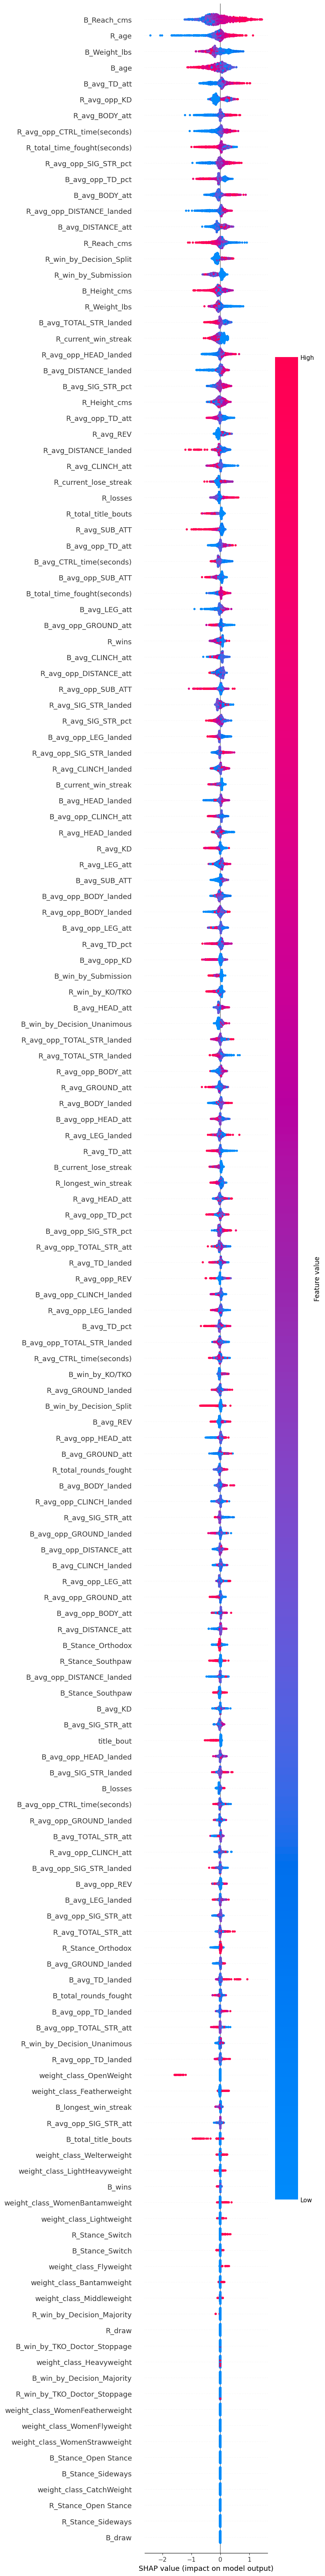

In [ ]:
xgb_model = voting_clf.named_estimators_['xgb']

# Create a SHAP explainer for the XGBClassifier
explainer = shap.Explainer(xgb_model, X_train_res)
shap_values = explainer(X_test)

# Plot the summary plot for SHAP values
shap.summary_plot(shap_values, X_test, feature_names=features,  max_display=len(features))